We now want to know the level of decisiveness of the four categorical variables 
* AdFormat
* FoldPosition
* OS
* DeviceType on whether a user will engage with an ad or not.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/ad_data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'CampaignId', 'AdGroupId', 'AudienceID', 'CreativeId',
       'AdFormat', 'Site', 'FoldPosition', 'Region', 'City', 'DeviceType',
       'OSFamily', 'OS', 'Browser', 'DeviceMake', 'AdvertiserCurrency',
       'click', 'engagement', 'video-end', 'video-start', 'engagement_rate',
       'hour'],
      dtype='object')

In [4]:
df = data[['AdFormat','FoldPosition','OS','DeviceType','engagement']]
df.head()

,AdFormat,FoldPosition,OS,DeviceType,engagement
0,300x250,4,173.0,4,0
1,300x250,2,173.0,4,0
2,300x250,3,156.0,4,0
3,300x250,4,101.0,4,0
4,300x250,3,101.0,4,1


In [30]:
def label_engage(row):
    if row['engagement']==1:
        return 0
    else:
        return 1
    
df['no_engagement'] = df.apply(label_engage,axis=1)

In [17]:
#convert OS from float to int
df.OS = df.OS.astype('Int64')

In [5]:
#get number of unique values per feature
df.T.apply(lambda x: x.nunique(),axis=1)

AdFormat         2
FoldPosition     3
OS              49
DeviceType       3
engagement       2
dtype: int64

**Note: all the variables selected happen to be categorical**

We use statistical tests to determine whether the output variable is dependent or independent of the input variables.

In [27]:
#Creating a contingency table with a summary of the observed outcomes
cat.groupby('engagement').sum()

,AdFormat,FoldPosition,OS,DeviceType
engagement,,,,
0,22988,64666,386393,5972
1,5393,10012,52619,90


In [29]:
engage = df[df.engagement==1]
not_engage = df[df.engagement==0]
engage

,AdFormat,FoldPosition,OS,DeviceType,engagement
4,300x250,3,101,4,1
5,300x250,4,162,4,1
7,320x480,3,162,4,1
9,320x480,4,101,4,1
12,320x480,4,156,4,1
...,...,...,...,...,...
96471,320x480,4,101,4,1
96474,300x250,3,162,4,1
96483,300x250,2,162,4,1
96501,320x480,3,174,4,1


In [25]:
from scipy.stats import chisquare
cat = df.apply(lambda x: pd.factorize(x)[0])

In [11]:
#~~~Plotting functions~~~
#pie chart plot
def plot_pie(data:pd.DataFrame,col:str,n:int)->None:
    data[col].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',explode=[0.05]*n,
                                colormap = 'summer', figsize = (10,10)).legend()
    plt.title(f'Distribution of {col}',size=15)
    plt.show()
    
#count plot
def plot_count(data:pd.DataFrame,col1:str):
    sns.countplot(data=data, x=col1,palette='summer',hue='engagement')
    plt.title(f'Distribution of {col1}', size=16, fontweight='bold')
    plt.xticks(rotation=70)
    plt.show()

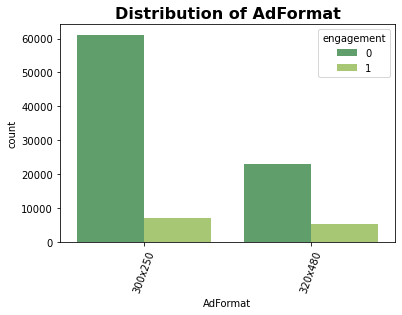

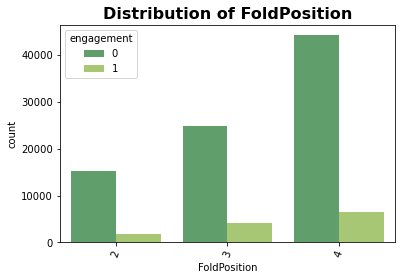

In [36]:
plot_count(df,'AdFormat')
plot_count(df,'FoldPosition')

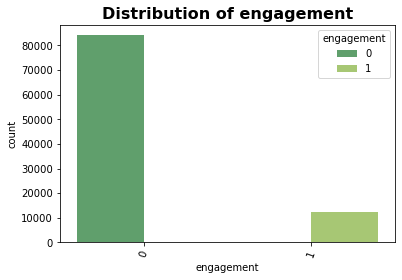

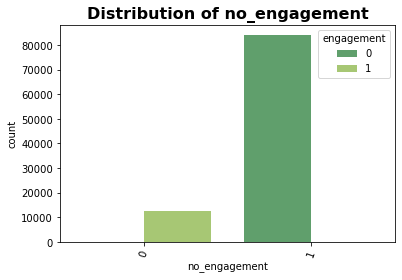

In [37]:
plot_count(df,'engagement')
plot_count(df,'no_engagement')

Most sites generally had no engagement